## Assignment 2
This notebook builds machine learning models that predicts ESRB rating of video game given features such as "Blood" and "Fantasy Violence"

For more information here is a link to the competition: [https://www.kaggle.com/competitions/cap-4611-2021-fall-assignment-02](https://www.kaggle.com/competitions/cap-4611-2021-fall-assignment-02)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb # Data visualization
import matplotlib.pyplot as plt
import scipy as stats


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inputd/sample_submission.csv
/kaggle/input/inputd/eval.csv
/kaggle/input/inputd/train.csv


# [2 point] You must load the data from the provided CSV files.


In [2]:
train = pd.read_csv("../input/inputd/train.csv")
test = pd.read_csv("../input/inputd/eval.csv")
submission = pd.read_csv("../input/inputd/sample_submission.csv")

In [3]:
train.head()

,id,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,474,Road to Ballhalla,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,475,RollerCoaster Legends II: Thor's Hammer,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,476,Island Time,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
3,477,Bridge Constructor Portal,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
4,478,Secret of Mana,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET


First there is a lot of data here that is useless to us and some that is redudant.

Let's remove that data.

In [4]:
train = train.drop(['title'], axis = 1)

In [5]:
train.head()

,id,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,474,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,475,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
2,476,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
3,477,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,478,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET


# [2 point] You must check for outliers within the training data and, if required, describe and implement an approach to handle those outliers.

In [6]:
train.describe()

,id,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,...,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.00000,1421.000000,1421.000000,1421.000000,1421.000000
mean,1184.000000,0.472203,0.048557,0.009852,0.219564,0.132301,0.019001,0.056298,0.034483,0.235749,...,0.014075,0.028149,0.055595,0.065447,0.116819,0.04152,0.111189,0.016890,0.016186,0.061928
std,410.351678,0.499402,0.215016,0.098803,0.414097,0.338937,0.136575,0.230578,0.182530,0.424616,...,0.117840,0.165457,0.229218,0.247400,0.321318,0.19956,0.314477,0.128903,0.126234,0.241110
min,474.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,829.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1184.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1539.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1894.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Because this contains binary information, there aren't outliers in the data.

-If I wanted a better score I could identify which groups don't have much information and treat those as outliers.

# [2 point] You must describe any data transformations or feature engineering that are required and provide an explanation as to "why" each is being done.

The ESRB ratings are currently strings, let's set them to integers based on this chart.

0-E

1-ET

2-LL

3-M

4-T


In [7]:
def ESRBTOINT(x):
    if x == 'E': return 0
    elif x == 'ET': return 1
    elif x == 'LL': return 2
    elif x == 'M': return 3
    elif x == 'T': return 4
    else: return -1
    
train['esrb_rating'] = train['esrb_rating'].apply(ESRBTOINT)
train['esrb_rating'].head()

0    0
1    1
2    1
3    1
4    1
Name: esrb_rating, dtype: int64

# [2 point] You must check for missing values within the training data and, if required, describe and implement an approach to handle those missing values.

In [8]:
train.isnull().sum().sort_values()

id                          0
use_of_drugs_and_alcohol    0
use_of_alcohol              0
suggestive_themes           0
strong_sexual_content       0
strong_janguage             0
simulated_gambling          0
sexual_themes               0
sexual_content              0
partial_nudity              0
nudity                      0
no_descriptors              0
mild_violence               0
mild_suggestive_themes      0
mild_lyrics                 0
mild_language               0
mild_fantasy_violence       0
mild_cartoon_violence       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
violence                    0
crude_humor                 0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
drug_reference              0
esrb_ratin

There is no missing data therefore we don't need to do anything. 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [10]:
predictors = train.drop(['esrb_rating'], axis = 1)
target = train["esrb_rating"]
X, X_val, y, y_val = train_test_split(predictors, target, test_size = 0.45, shuffle = True)

x_test = test.copy()


# [2 point] You must build and train a Logistic Regression model on the training data and evaluate its performance on a set of validation data
You must generate a distribution of validation scores, as well as summary statistics for this distribution (using the pandas describe() method)

In [11]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X,y)
model1Score = (model1.score(X, y) * 100)
print('Ordinary Least Squares:',model1Score,'%')

Ordinary Least Squares: 66.5451064958982 %


# [2 point] You must build and train an Support Vector Machine on the training data and evaluate its performance on a set of validation data
You must generate a distribution of validation scores, as well as summary statistics for this distribution (using the pandas describe() method)

In [12]:
from sklearn.svm import SVR

model2 = SVR()
model2.fit(X,y)
model2Score = (model2.score(X, y) * 100)
print('Ordinary Least Squares:',model2Score,'%')

Ordinary Least Squares: -13.632768649965143 %


# [2 point] You must build and train a Decision Tree model on the training data and evaluate its performance on a set of validation data
You must generate a distribution of validation scores, as well as summary statistics for this distribution (using the pandas describe() method)

In [13]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X, y)
model3Score = (model3.score(X, y) * 100)
print('Ordinary Least Squares:',model3Score,'%')

Ordinary Least Squares: 100.0 %


# [2 point] You must build and train a Random Forest model on the training data and evaluate its performance on a set of validation data
You must generate a distribution of validation scores, as well as summary statistics for this distribution (using the pandas describe() method)

In [14]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier( max_features = "auto", min_samples_leaf = 1)
model4.fit(X, y)
model4Score = (model4.score(X, y) * 100)
print('Ordinary Least Squares:',model4Score,'%')

Ordinary Least Squares: 100.0 %


# [2 point] You must build and train a K Nearest Neighbors model on the training data and evaluate its performance on a set of validation data
You must generate a distribution of validation scores, as well as summary statistics for this distribution (using the pandas describe() method)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

model5 = KNeighborsClassifier()
model5.fit(X, y)
model5Score = (model5.score(X, y) * 100)
print('Ordinary Least Squares:',model5Score,'%')

Ordinary Least Squares: 51.21638924455826 %


# [2 points] You must select the best model that you have generated and use that model to predict the target vector for the test data.
You must save this this target vector to your submission.csv file and print the contents of your submission.csv file within the notebook

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Name', ylabel='Validation Score'>

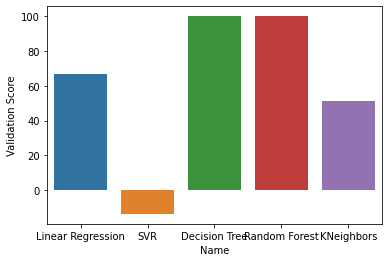

In [16]:
d = {'Name': ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest', 'KNeighbors'], 'Validation Score': [model1Score, model2Score, model3Score, model4Score, model5Score]}

ValidationDF = pd.DataFrame(data = d)

#ValidationDF.head()

sb.barplot(ValidationDF['Name'], ValidationDF['Validation Score'] )

Clearly, Decision tree and Random Forest are the best models. However after submitting Random Forest edges out Decision Tree so we are going to use Random Forest for our submission (model 4)

In [17]:
Y_pred = model4.predict(x_test)

submit = pd.DataFrame({'id': test['id'], 'esrb_rating': Y_pred})


def inToESRB(x):
    if x == 0: return 'E'
    elif x == 1: return 'ET'
    elif x == 2: return 'LL'
    elif x == 3: return 'M'
    elif x == 4: return 'T'
    else: return -1
    
submit['esrb_rating'] = submit['esrb_rating'].apply(inToESRB)


submit.to_csv('submission.csv', index = False)
print("Submission GOOD")

print(submit)


Submission GOOD
      id esrb_rating
0      0           E
1      1           T
2      2           M
3      3           E
4      4           T
..   ...         ...
469  469           T
470  470          ET
471  471          ET
472  472           T
473  473           E

[474 rows x 2 columns]
